### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load tensorflow

In [0]:
import tensorflow as tf

In [0]:
tf.random.set_seed(42) # this is new way to set random seed instead of tf.set_random_seed(42)

In [0]:
#!pip uninstall tensorflow

In [0]:
#!pip install -U tensorflow==2.0 

In [5]:
tf.__version__

'2.0.0'

### Collect Data

In [6]:
import keras

Using TensorFlow backend.


In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [8]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [9]:
trainY

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
train_Y = tf.keras.utils.to_categorical(trainY, num_classes=10) # used a new variable because the int dtype trainY will be used in the visualization step 
test_Y = tf.keras.utils.to_categorical(testY, num_classes=10)

In [11]:
print(train_Y.shape)
print('First 5 examples now are: ', train_Y[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


In [12]:
trainX.shape

(60000, 28, 28)

In [13]:
len(trainY)

60000

In [14]:
trainY

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
testX.shape

(10000, 28, 28)

In [16]:
len(testY)

10000

### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
import matplotlib.pyplot as plt

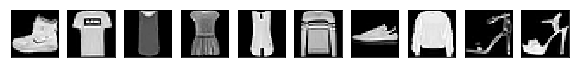

('label for each of the above image:', '9, 0, 0, 3, 0, 2, 7, 2, 5, 5')


In [18]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i],cmap='gist_gray')  # cmap has various others options like cmaps['Sequential (2)'] = ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink','spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia','hot', 'afmhot', 'gist_heat', 'copper']
    
plt.show()
a=[]
for i in range(10):
    a.append(trainY[i])  # used trainY here because it contains labels in int form and train_Y has labels in array form

print ('label for each of the above image:',str(a)[1:-1])


### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add Dense Layer which provides 10 Outputs
model.add(tf.keras.layers.Dense(10, activation='softmax')) 

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

### Execute the model using model.fit()

In [20]:
model.fit(trainX, train_Y, 
          validation_data=(testX, test_Y), 
          epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 71us/sample - loss: 2011.6727 - accuracy: 0.7401 - val_loss: 1199.9495 - val_accuracy: 0.7971
Epoch 2/10
60000/60000 [==============================] - 4s 61us/sample - loss: 1633.6321 - accuracy: 0.7783 - val_loss: 2663.1756 - val_accuracy: 0.6535
Epoch 3/10
60000/60000 [==============================] - 4s 60us/sample - loss: 1537.2961 - accuracy: 0.7866 - val_loss: 1683.3549 - val_accuracy: 0.7954
Epoch 4/10
60000/60000 [==============================] - 4s 60us/sample - loss: 1490.8963 - accuracy: 0.7896 - val_loss: 936.9344 - val_accuracy: 0.8281
Epoch 5/10
60000/60000 [==============================] - 4s 60us/sample - loss: 1464.8133 - accuracy: 0.7960 - val_loss: 1086.2411 - val_accuracy: 0.7955
Epoch 6/10
60000/60000 [==============================] - 4s 60us/sample - loss: 1483.4326 - accuracy: 0.7934 - val_loss: 2105.1294 - val_accuracy: 0.7525
Epoch 7/10
60000/6000

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization()) # Batch Normalization

#Add Dense Layer which provides 10 Outputs
model.add(tf.keras.layers.Dense(10, activation='softmax')) 


#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Execute the model

In [22]:
model.fit(trainX, train_Y, 
          validation_data=(testX, test_Y), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.5945 - accuracy: 0.7950 - val_loss: 0.5239 - val_accuracy: 0.8215
Epoch 2/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4924 - accuracy: 0.8309 - val_loss: 0.4984 - val_accuracy: 0.8311
Epoch 3/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4698 - accuracy: 0.8375 - val_loss: 0.4970 - val_accuracy: 0.8378
Epoch 4/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4576 - accuracy: 0.8416 - val_loss: 0.4839 - val_accuracy: 0.8370
Epoch 5/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4516 - accuracy: 0.8445 - val_loss: 0.4725 - val_accuracy: 0.8417
Epoch 6/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4453 - accuracy: 0.8460 - val_loss: 0.4611 - val_accuracy: 0.8414
Epoch 7/10
60000/60000 [==============================] 

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=sgd_optimizer,  loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [24]:
model.fit(trainX, train_Y, 
          validation_data=(testX, test_Y), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4174 - accuracy: 0.8555 - val_loss: 0.4640 - val_accuracy: 0.8432
Epoch 2/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4168 - accuracy: 0.8566 - val_loss: 0.4613 - val_accuracy: 0.8439
Epoch 3/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.4156 - accuracy: 0.8550 - val_loss: 0.4686 - val_accuracy: 0.8444
Epoch 4/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4150 - accuracy: 0.8568 - val_loss: 0.4615 - val_accuracy: 0.8434
Epoch 5/10
60000/60000 [==============================] - 5s 92us/sample - loss: 0.4160 - accuracy: 0.8556 - val_loss: 0.4617 - val_accuracy: 0.8438
Epoch 6/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.4148 - accuracy: 0.8561 - val_loss: 0.4526 - val_accuracy: 0.8446
Epoch 7/10
60000/60000 [==============================] 

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model_1 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model_1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model_1.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model_1.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 2nd hidden layer
model_1.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 3rd hidden layer
model_1.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [0]:
#Add OUTPUT layer
model_1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Compile the model
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model_1.compile(optimizer=sgd_optimizer,  loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Review model

In [31]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 92,856
Trainable params: 91,288
Non-trainable params: 1,568
______________________________________________

### Run the model

In [32]:
model_1.fit(trainX, train_Y, 
          validation_data=(testX, test_Y), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 135us/sample - loss: 1.9490 - accuracy: 0.3557 - val_loss: 1.4082 - val_accuracy: 0.5513
Epoch 2/10
60000/60000 [==============================] - 7s 123us/sample - loss: 1.1553 - accuracy: 0.6157 - val_loss: 0.9329 - val_accuracy: 0.6861
Epoch 3/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.8217 - accuracy: 0.7121 - val_loss: 0.7121 - val_accuracy: 0.7442
Epoch 4/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.6843 - accuracy: 0.7591 - val_loss: 0.6236 - val_accuracy: 0.7777
Epoch 5/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.6103 - accuracy: 0.7922 - val_loss: 0.5659 - val_accuracy: 0.8086
Epoch 6/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.5557 - accuracy: 0.8116 - val_loss: 0.5247 - val_accuracy: 0.8237
Epoch 7/10
60000/60000 [==========================